#Task I: Setup, Data Importation and Preparation

##1 - A. Header

Title: Ensemble Modeling and Logistic Regression

Author: Abdulrahman Abed

Date: 04/20/2022

###Package Imports & Random State

In [ ]:
# Mathematics and Dataframe Packages
import numpy as np
import pandas as pd

# Google Colab and CSV Packages
from google.colab import drive
import csv

# Graphical Packages
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Data Preparation Packages, 
from sklearn.model_selection import train_test_split

# Cross-Validation and Grid-Searching Packages
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

# Modeling Packages - Single
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Modeling Packages - Ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

# Model Evaluation Packages
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Suppress Warning Messages
import warnings
warnings.filterwarnings('ignore')

random_state = 0

###Pre-Defined Function(s)

In [ ]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

##1 - B. Import data

In [ ]:
%%capture
from google.colab import drive
drive.mount('/content/drive')
cd_df = pd.read_csv('/content/drive/MyDrive/Data_Sets/CD_additional_balanced.csv')

##1 - C. Overall Structure & Summary

In [ ]:
cd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9280 entries, 0 to 9279
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9280 non-null   int64  
 1   job             9280 non-null   object 
 2   marital         9280 non-null   object 
 3   education       9280 non-null   object 
 4   default         9280 non-null   object 
 5   housing         9280 non-null   object 
 6   loan            9280 non-null   object 
 7   contact         9280 non-null   object 
 8   month           9280 non-null   object 
 9   day_of_week     9280 non-null   object 
 10  duration        9280 non-null   int64  
 11  campaign        9280 non-null   int64  
 12  pdays           9280 non-null   int64  
 13  previous        9280 non-null   int64  
 14  poutcome        9280 non-null   object 
 15  emp.var.rate    9280 non-null   float64
 16  cons.price.idx  9280 non-null   float64
 17  cons.conf.idx   9280 non-null   f

In [ ]:
cd_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000
mean,40.403448,387.361746,2.333297,887.282435,0.315302,-0.496272,93.479178,-40.218125,2.960209,5135.306487
std,12.062030,357.711742,2.334467,313.802415,0.700671,1.721204,0.634510,5.360642,1.890402,87.105317
min,17.000000,1.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,145.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-42.700000,1.244000,5076.200000
50%,38.000000,265.000000,2.000000,999.000000,0.000000,-0.100000,93.444000,-41.800000,4.021000,5191.000000
75%,48.000000,528.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.959000,5228.100000
max,98.000000,4199.000000,39.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
cd_df.head(15)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
1,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
2,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
3,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
4,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
5,42,blue-collar,married,basic.9y,no,yes,yes,telephone,may,mon,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
6,39,housemaid,married,basic.9y,no,yes,no,telephone,may,mon,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
7,28,unknown,single,unknown,unknown,yes,yes,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
8,44,services,married,high.school,no,yes,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
9,42,technician,married,professional.course,no,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes


##1 - D. Converting Integers to Float Datatypes

In [ ]:
int_columns_list = list(cd_df.select_dtypes(include='int64').columns)
cd_df[int_columns_list] = cd_df[int_columns_list].astype('float')

cd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9280 entries, 0 to 9279
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9280 non-null   float64
 1   job             9280 non-null   object 
 2   marital         9280 non-null   object 
 3   education       9280 non-null   object 
 4   default         9280 non-null   object 
 5   housing         9280 non-null   object 
 6   loan            9280 non-null   object 
 7   contact         9280 non-null   object 
 8   month           9280 non-null   object 
 9   day_of_week     9280 non-null   object 
 10  duration        9280 non-null   float64
 11  campaign        9280 non-null   float64
 12  pdays           9280 non-null   float64
 13  previous        9280 non-null   float64
 14  poutcome        9280 non-null   object 
 15  emp.var.rate    9280 non-null   float64
 16  cons.price.idx  9280 non-null   float64
 17  cons.conf.idx   9280 non-null   f

##1 - E. Target Variable Extraction

In [ ]:
y_target = cd_df.pop('y')
y_target = pd.get_dummies(y_target,drop_first=True)
cd_df['y_target'] = y_target

##1 - F. Converting Objects to Category Datatypes

In [ ]:
obj_columns_list = list(cd_df.select_dtypes(include='object').columns)
cd_df[obj_columns_list] = cd_df[obj_columns_list].astype('category')

cd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9280 entries, 0 to 9279
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             9280 non-null   float64 
 1   job             9280 non-null   category
 2   marital         9280 non-null   category
 3   education       9280 non-null   category
 4   default         9280 non-null   category
 5   housing         9280 non-null   category
 6   loan            9280 non-null   category
 7   contact         9280 non-null   category
 8   month           9280 non-null   category
 9   day_of_week     9280 non-null   category
 10  duration        9280 non-null   float64 
 11  campaign        9280 non-null   float64 
 12  pdays           9280 non-null   float64 
 13  previous        9280 non-null   float64 
 14  poutcome        9280 non-null   category
 15  emp.var.rate    9280 non-null   float64 
 16  cons.price.idx  9280 non-null   float64 
 17  cons.conf.idx 

##1 - G. Categorical Variable One-hot encoding

In [ ]:
# Create dummies from categorical variables
category_columns_list = list(cd_df.select_dtypes(include='category').columns)
cd_onehot_df = pd.get_dummies(cd_df,columns=category_columns_list)

##1 - H. Independent/Dependent Variable Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cd_onehot_df.drop('y_target',axis=1),
                                                    cd_onehot_df['y_target'],
                                                    test_size=0.2,
                                                    random_state=random_state)
X = cd_onehot_df
y = cd_onehot_df.pop('y_target')

#Task II: Simple Model

##2 - A. Validation

In [ ]:
dt = DecisionTreeClassifier(random_state=random_state).fit(X,y)

dt_df = pd.DataFrame(cross_validate(dt,X,y,cv=5,scoring=['f1'],return_train_score=True)).agg('mean').round(5)
dt_df

fit_time      0.06267
score_time    0.00455
test_f1       0.16470
train_f1      1.00000
dtype: float64

##2 - B. Results 

In [ ]:
dt_df = pd.DataFrame(cross_validate(dt,X,y,cv=5,scoring=['f1'],return_train_score=True)).agg('mean').round(5)
dt_df

fit_time      0.16753
score_time    0.01600
test_f1       0.16470
train_f1      1.00000
dtype: float64

#Task III: Grid Searches

##3 - A.

In [ ]:
# Choose Parameter Options
parameters = {'max_depth':list(range(1,5)),
              'n_estimators':[1,2,3,]}
# 20 x 20 = 400 candidates
# 400 x 5 folds = 2000 total models

# Sequential Grid Search
rf_grid = GridSearchCV(RandomForestClassifier(n_jobs=-1,random_state=random_state),parameters,cv=5,scoring=['f1'],return_train_score=True,refit=False,verbose=3)
rf_grid = rf_grid.fit(X,y)

# Get Results
# Display Specific Result Dataframe Columns
# Sort by Highest Testing F1-Score
results1 = rf_grid.cv_results_
pd.DataFrame(results1)[['param_max_depth',
                       'param_n_estimators',
                       'mean_fit_time',
                       'mean_score_time',
                       'mean_train_f1',
                       'mean_test_f1']].sort_values('mean_test_f1',ascending=False).head(10)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END max_depth=1, n_estimators=1; f1: (train=0.819, test=0.000) total time=   0.1s
[CV 2/5] END max_depth=1, n_estimators=1; f1: (train=0.736, test=0.000) total time=   0.1s
[CV 3/5] END max_depth=1, n_estimators=1; f1: (train=0.639, test=0.111) total time=   0.1s
[CV 4/5] END max_depth=1, n_estimators=1; f1: (train=0.771, test=0.610) total time=   0.1s
[CV 5/5] END max_depth=1, n_estimators=1; f1: (train=0.687, test=0.459) total time=   0.1s
[CV 1/5] END max_depth=1, n_estimators=2; f1: (train=0.819, test=0.000) total time=   0.3s
[CV 2/5] END max_depth=1, n_estimators=2; f1: (train=0.729, test=0.189) total time=   0.3s
[CV 3/5] END max_depth=1, n_estimators=2; f1: (train=0.632, test=0.456) total time=   0.2s
[CV 4/5] END max_depth=1, n_estimators=2; f1: (train=0.771, test=0.610) total time=   0.1s
[CV 5/5] END max_depth=1, n_estimators=2; f1: (train=0.729, test=0.461) total time=   0.2s
[CV 1/5] END max_depth=1, n_e

,param_max_depth,param_n_estimators,mean_fit_time,mean_score_time,mean_train_f1,mean_test_f1
6,3,1,0.041542,0.005101,0.843778,0.555875
7,3,2,0.087173,0.107789,0.846690,0.419954
8,3,3,0.142346,0.124780,0.821886,0.403670
2,1,3,0.134701,0.106570,0.752558,0.394063
10,4,2,0.158163,0.109522,0.846655,0.356749
1,1,2,0.118074,0.108386,0.736107,0.343082
5,2,3,0.093321,0.106311,0.749527,0.304940
9,4,1,0.156986,0.014092,0.829095,0.302280
11,4,3,0.156989,0.114395,0.845353,0.299065
4,2,2,0.087633,0.106502,0.764888,0.279289


##3 - B.

In [ ]:
# Sequential Grid Search
svc1_grid = GridSearchCV(SVC(kernel='sigmoid', random_state=random_state),parameters,cv=5,scoring=['f1'],return_train_score=True,refit=False,verbose=3)
svc1_grid = rf_grid.fit(X,y)

# Get Results
# Display Specific Result Dataframe Columns
# Sort by Highest Testing F1-Score
results2 = svc1_grid.cv_results_
pd.DataFrame(results2)[['param_max_depth',
                       'param_n_estimators',
                       'mean_fit_time',
                       'mean_score_time',
                       'mean_train_f1',
                       'mean_test_f1']].sort_values('mean_test_f1',ascending=False).head(10)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END max_depth=1, n_estimators=1; f1: (train=0.819, test=0.000) total time=   0.0s
[CV 2/5] END max_depth=1, n_estimators=1; f1: (train=0.736, test=0.000) total time=   0.0s
[CV 3/5] END max_depth=1, n_estimators=1; f1: (train=0.639, test=0.111) total time=   0.0s
[CV 4/5] END max_depth=1, n_estimators=1; f1: (train=0.771, test=0.610) total time=   0.0s
[CV 5/5] END max_depth=1, n_estimators=1; f1: (train=0.687, test=0.459) total time=   0.0s
[CV 1/5] END max_depth=1, n_estimators=2; f1: (train=0.819, test=0.000) total time=   0.1s
[CV 2/5] END max_depth=1, n_estimators=2; f1: (train=0.729, test=0.189) total time=   0.1s
[CV 3/5] END max_depth=1, n_estimators=2; f1: (train=0.632, test=0.456) total time=   0.2s
[CV 4/5] END max_depth=1, n_estimators=2; f1: (train=0.771, test=0.610) total time=   0.1s
[CV 5/5] END max_depth=1, n_estimators=2; f1: (train=0.729, test=0.461) total time=   0.2s
[CV 1/5] END max_depth=1, n_e

,param_max_depth,param_n_estimators,mean_fit_time,mean_score_time,mean_train_f1,mean_test_f1
6,3,1,0.040689,0.006148,0.843778,0.555875
7,3,2,0.086040,0.106306,0.846690,0.419954
8,3,3,0.094259,0.106141,0.821886,0.403670
2,1,3,0.111849,0.105995,0.752558,0.394063
10,4,2,0.153643,0.127201,0.846655,0.356749
1,1,2,0.070489,0.105979,0.736107,0.343082
5,2,3,0.073007,0.106044,0.749527,0.304940
9,4,1,0.044938,0.005082,0.829095,0.302280
11,4,3,0.170625,0.120423,0.845353,0.299065
4,2,2,0.027305,0.106070,0.764888,0.279289


##3 - C.

In [ ]:
# Sequential Grid Search
svc2_grid = GridSearchCV(SVC(kernel='rbf', random_state=random_state),parameters,cv=5,scoring=['f1'],return_train_score=True,refit=False,verbose=3)
svc2_grid = rf_grid.fit(X,y)

# Get Results
# Display Specific Result Dataframe Columns
# Sort by Highest Testing F1-Score
results3 = svc2_grid.cv_results_
pd.DataFrame(results3)[['param_max_depth',
                       'param_n_estimators',
                       'mean_fit_time',
                       'mean_score_time',
                       'mean_train_f1',
                       'mean_test_f1']].sort_values('mean_test_f1',ascending=False).head(10)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END max_depth=1, n_estimators=1; f1: (train=0.819, test=0.000) total time=   0.0s
[CV 2/5] END max_depth=1, n_estimators=1; f1: (train=0.736, test=0.000) total time=   0.1s
[CV 3/5] END max_depth=1, n_estimators=1; f1: (train=0.639, test=0.111) total time=   0.0s
[CV 4/5] END max_depth=1, n_estimators=1; f1: (train=0.771, test=0.610) total time=   0.0s
[CV 5/5] END max_depth=1, n_estimators=1; f1: (train=0.687, test=0.459) total time=   0.1s
[CV 1/5] END max_depth=1, n_estimators=2; f1: (train=0.819, test=0.000) total time=   0.2s
[CV 2/5] END max_depth=1, n_estimators=2; f1: (train=0.729, test=0.189) total time=   0.1s
[CV 3/5] END max_depth=1, n_estimators=2; f1: (train=0.632, test=0.456) total time=   0.1s
[CV 4/5] END max_depth=1, n_estimators=2; f1: (train=0.771, test=0.610) total time=   0.1s
[CV 5/5] END max_depth=1, n_estimators=2; f1: (train=0.729, test=0.461) total time=   0.2s
[CV 1/5] END max_depth=1, n_e

,param_max_depth,param_n_estimators,mean_fit_time,mean_score_time,mean_train_f1,mean_test_f1
6,3,1,0.041057,0.005851,0.843778,0.555875
7,3,2,0.129272,0.106250,0.846690,0.419954
8,3,3,0.114914,0.106720,0.821886,0.403670
2,1,3,0.093163,0.106552,0.752558,0.394063
10,4,2,0.070288,0.106613,0.846655,0.356749
1,1,2,0.066833,0.106123,0.736107,0.343082
5,2,3,0.137522,0.111901,0.749527,0.304940
9,4,1,0.064253,0.005382,0.829095,0.302280
11,4,3,0.095330,0.106285,0.845353,0.299065
4,2,2,0.066468,0.106291,0.764888,0.279289


#Task IV: Majority Voting

##4 - A.

In [ ]:
# SVM with Sigmoid Kernel Grid
parameters_svm_sig = {'C':list(range(1,11))}
svc1_grid = GridSearchCV(SVC(kernel='sigmoid',random_state=random_state),parameters_svm_sig,cv=5,scoring=['f1'],return_train_score=True,refit='f1',verbose=3)

# Random Forest Grid
parameters_rf = {'max_depth':list(range(1,11)),'n_estimators':[1,2,3,4,5]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=random_state),parameters_rf,cv=5,scoring=['f1'],return_train_score=True,refit='f1',verbose=3)

# SVM with RBF Kernel Grid
parameters_svm_rbf = {'C':list(range(1,11))}
svc2_grid = GridSearchCV(SVC(kernel='rbf',random_state=random_state),parameters_svm_rbf,cv=5,scoring=['f1'],return_train_score=True,refit='f1',verbose=3)


##4 - B.

In [ ]:
# Define the Ensemble Voting Model from the Grids
voting_grid_model = VotingClassifier(estimators=[('svm_sigmoid',svc1_grid),
                                                 ('rf',rf_grid),
                                                 ('svm_rbf',svc2_grid)],
                                     voting='hard')

##4 - C.

In [ ]:
# Display the Model's Cross-Validation Results as a Dataframe
voting_grid_df = pd.DataFrame(cross_validate(voting_grid_model,X,y,cv=5,scoring=['f1'],return_train_score=True)).agg('mean').round(5)
voting_grid_df

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ..............C=1; f1: (train=0.620, test=0.674) total time=   3.7s
[CV 2/5] END ..............C=1; f1: (train=0.608, test=0.654) total time=   3.7s
[CV 3/5] END ..............C=1; f1: (train=0.673, test=0.487) total time=   3.6s
[CV 4/5] END ..............C=1; f1: (train=0.655, test=0.608) total time=   3.7s
[CV 5/5] END ..............C=1; f1: (train=0.629, test=0.710) total time=   3.9s
[CV 1/5] END ..............C=2; f1: (train=0.612, test=0.680) total time=   3.4s
[CV 2/5] END ..............C=2; f1: (train=0.598, test=0.664) total time=   3.4s
[CV 3/5] END ..............C=2; f1: (train=0.663, test=0.474) total time=   3.3s
[CV 4/5] END ..............C=2; f1: (train=0.647, test=0.590) total time=   3.4s
[CV 5/5] END ..............C=2; f1: (train=0.620, test=0.689) total time=   3.6s
[CV 1/5] END ..............C=3; f1: (train=0.601, test=0.677) total time=   3.2s
[CV 2/5] END ..............C=3; f1: (train=0.585

KeyboardInterrupt: ignored

#Task V: Gradient Boosting

##5 - A.

In [ ]:
# Choose Parameter Options
parameters = {'max_depth':list(range(1,10)),
              'n_estimators':[1,2,3]}

##5 - B.

In [ ]:
GB_grid = GridSearchCV(GradientBoostingClassifier(random_state=random_state),parameters,cv=5,scoring=['f1'],return_train_score=True,refit=False,verbose=3)
GB_grid = GB_grid.fit(X,y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END max_depth=1, n_estimators=1; f1: (train=0.820, test=0.000) total time=   0.0s
[CV 2/5] END max_depth=1, n_estimators=1; f1: (train=0.713, test=0.000) total time=   0.0s
[CV 3/5] END max_depth=1, n_estimators=1; f1: (train=0.639, test=0.111) total time=   0.0s
[CV 4/5] END max_depth=1, n_estimators=1; f1: (train=0.766, test=0.584) total time=   0.0s
[CV 5/5] END max_depth=1, n_estimators=1; f1: (train=0.690, test=0.464) total time=   0.0s
[CV 1/5] END max_depth=1, n_estimators=2; f1: (train=0.820, test=0.000) total time=   0.0s
[CV 2/5] END max_depth=1, n_estimators=2; f1: (train=0.743, test=0.000) total time=   0.0s
[CV 3/5] END max_depth=1, n_estimators=2; f1: (train=0.825, test=0.751) total time=   0.0s
[CV 4/5] END max_depth=1, n_estimators=2; f1: (train=0.766, test=0.584) total time=   0.0s
[CV 5/5] END max_depth=1, n_estimators=2; f1: (train=0.746, test=0.695) total time=   0.0s
[CV 1/5] END max_depth=1, n_

##5 - C.

In [ ]:
GB_grid_df = pd.DataFrame(cross_validate(GB_grid,X,y,cv=5,scoring=['f1'],return_train_score=True)).agg('mean').round(5)
GB_grid_df

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END max_depth=1, n_estimators=1; f1: (train=0.889, test=0.116) total time=   0.0s
[CV 2/5] END max_depth=1, n_estimators=1; f1: (train=0.817, test=0.000) total time=   0.0s
[CV 3/5] END max_depth=1, n_estimators=1; f1: (train=0.811, test=0.849) total time=   0.0s
[CV 4/5] END max_depth=1, n_estimators=1; f1: (train=0.812, test=0.848) total time=   0.0s
[CV 5/5] END max_depth=1, n_estimators=1; f1: (train=0.813, test=0.078) total time=   0.0s
[CV 1/5] END max_depth=1, n_estimators=2; f1: (train=0.889, test=0.116) total time=   0.0s
[CV 2/5] END max_depth=1, n_estimators=2; f1: (train=0.817, test=0.000) total time=   0.0s
[CV 3/5] END max_depth=1, n_estimators=2; f1: (train=0.811, test=0.849) total time=   0.0s
[CV 4/5] END max_depth=1, n_estimators=2; f1: (train=0.805, test=0.878) total time=   0.0s
[CV 5/5] END max_depth=1, n_estimators=2; f1: (train=0.813, test=0.078) total time=   0.0s
[CV 1/5] END max_depth=1, n_

fit_time      8.82451
score_time    0.00093
test_f1           NaN
train_f1          NaN
dtype: float64

#Task VI: Stacked Gradient Boosting

##6 - A.

In [ ]:
## Define the Voting Grids

# SVM with Sigmoid Kernel Grid
parameters_svm_sig = {'C':list(range(1,11))}
model1_grid = GridSearchCV(SVC(kernel='sigmoid',random_state=random_state),parameters_svm_sig,cv=5,scoring=['f1'],return_train_score=True,refit='f1',verbose=3)

# Random Forest Grid
parameters_rf = {'max_depth':list(range(1,21)),'n_estimators':[1,2,3,4,5,6,7,8,9,10,100,200]}
model2_grid = GridSearchCV(RandomForestClassifier(random_state=random_state),parameters_rf,cv=5,scoring=['f1'],return_train_score=True,refit='f1',verbose=3)

# SVM with RBF Kernel Grid
parameters_svm_rbf = {'C':list(range(1,11))}
model3_grid = GridSearchCV(SVC(kernel='rbf',random_state=random_state),parameters_svm_rbf,cv=5,scoring=['f1'],return_train_score=True,refit='f1',verbose=3)


##6 - B.

In [ ]:
# Collection of Model Grids for the Stack
estimators = [('svm_sig',model1_grid),
              ('rf',model2_grid),
              ('svm_rbf',model3_grid)]

# Define the Gradient Boosting Estimator for the Grid Stack
final_estimator = GradientBoostingClassifier(n_estimators=5,
                                             subsample=0.5,
                                             min_samples_leaf=5,
                                             max_features=1,
                                             random_state=random_state)

# Define the Stacking Model
stacked_grid_model = StackingClassifier(estimators=estimators,final_estimator=final_estimator)



##6 - C.

In [ ]:
# Display the Cross-Validation Results as a Dataframe
stacked_grid_df = pd.DataFrame(cross_validate(stacked_grid_model,X,y,scoring=['f1'],return_train_score=True)).agg('mean').round(5)
stacked_grid_df

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ..............C=1; f1: (train=0.620, test=0.674) total time=   3.7s
[CV 2/5] END ..............C=1; f1: (train=0.608, test=0.654) total time=   3.7s
[CV 3/5] END ..............C=1; f1: (train=0.673, test=0.487) total time=   3.6s
[CV 4/5] END ..............C=1; f1: (train=0.655, test=0.608) total time=   3.7s
[CV 5/5] END ..............C=1; f1: (train=0.629, test=0.710) total time=   3.9s
[CV 1/5] END ..............C=2; f1: (train=0.612, test=0.680) total time=   3.4s
[CV 2/5] END ..............C=2; f1: (train=0.598, test=0.664) total time=   3.5s
[CV 3/5] END ..............C=2; f1: (train=0.663, test=0.474) total time=   3.3s
[CV 4/5] END ..............C=2; f1: (train=0.647, test=0.590) total time=   3.4s
[CV 5/5] END ..............C=2; f1: (train=0.620, test=0.689) total time=   3.6s
[CV 1/5] END ..............C=3; f1: (train=0.601, test=0.677) total time=   3.3s
[CV 2/5] END ..............C=3; f1: (train=0.585

KeyboardInterrupt: ignored

#Task VII: Logistic Regression

##7 - A.

In [ ]:
# Make a Train/Test Split with 80/20 Ratio
cd_onehot_df['y_target'] = y_target
X_train, X_test, y_train, y_test = train_test_split(cd_onehot_df.drop('y_target',axis=1),
                                                    cd_onehot_df['y_target'],
                                                    test_size=0.2,
                                                    random_state=random_state)

# Define
lr_model = LogisticRegression(random_state=random_state)

# Fit
lr_model = lr_model.fit(X_train,y_train)

##7 - B.

In [ ]:
# Predict
lr_predictions = lr_model.predict(X_test)

##7 - C.

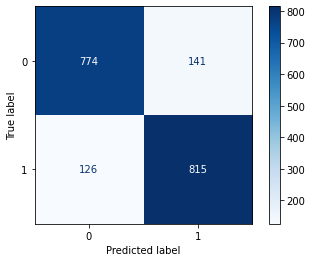

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       915
           1       0.85      0.87      0.86       941

    accuracy                           0.86      1856
   macro avg       0.86      0.86      0.86      1856
weighted avg       0.86      0.86      0.86      1856



In [ ]:
# Evaluate - Confusion Matrix
con_mat_test = confusion_matrix(y_test,lr_predictions,labels=[0,1])
ax = ConfusionMatrixDisplay(confusion_matrix=con_mat_test,display_labels=[0,1])
ax.plot(values_format='',cmap=plt.cm.Blues)
plt.show()

# Evaluate - Classification Report
print(classification_report(y_test,lr_predictions))

#Task VIII: IPYNB and HTML Files

##8 - A. IPYNB Download ✅

##8 - B. Assignment File HTML Render

In [ ]:
%%shell
 jupyter nbconvert --to html Assignment11_Abed_Abdulrahman.ipynb

[NbConvertApp] Converting notebook Assignment11_Abed_Abdulrahman.ipynb to html
[NbConvertApp] Writing 718935 bytes to Assignment11_Abed_Abdulrahman.html
